In [14]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [15]:
import pandas as pd
import numpy as np
# import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
path = '../Dataset/Embedding/'
outputFilename = 'delhiconventionalOutput.csv'

## With Word Embedding (BoW) Dataset

In [30]:
X = pd.read_csv(path+'delhi_WE_100.csv')
Y = pd.read_csv(path+'delhi_classLabel.csv')
print(X.shape,Y.shape)

(15438, 100) (15438, 1)


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
Y.shape

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(15438,)

In [32]:
Y

array([2, 5, 2, ..., 4, 2, 2])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
print(X_train.shape, X_test.shape)

(11578, 100) (3860, 100)


In [36]:
model = XGBClassifier(objective="multi:softprob", random_state=42)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [37]:
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
pred_proba

array([[4.3514580e-04, 1.9752879e-04, 5.6719466e-04, ..., 9.4457093e-05,
        6.1536930e-04, 3.7867684e-02],
       [1.4162418e-05, 7.9164478e-05, 9.4190160e-05, ..., 3.6493705e-06,
        7.8872232e-05, 6.0196644e-06],
       [7.3561573e-04, 6.9370602e-05, 3.9264392e-03, ..., 2.5688356e-05,
        9.9383789e-01, 6.0605706e-04],
       ...,
       [1.2946430e-06, 4.5747069e-07, 7.0336857e-05, ..., 2.0345435e-05,
        2.9574737e-06, 9.9987912e-01],
       [6.4495842e-05, 1.2752744e-03, 5.2642634e-05, ..., 9.6298158e-05,
        9.4365721e-05, 7.4822121e-05],
       [3.1934592e-06, 6.7707572e-07, 4.3480400e-06, ..., 5.2828511e-07,
        9.9997878e-01, 2.6002522e-07]], dtype=float32)

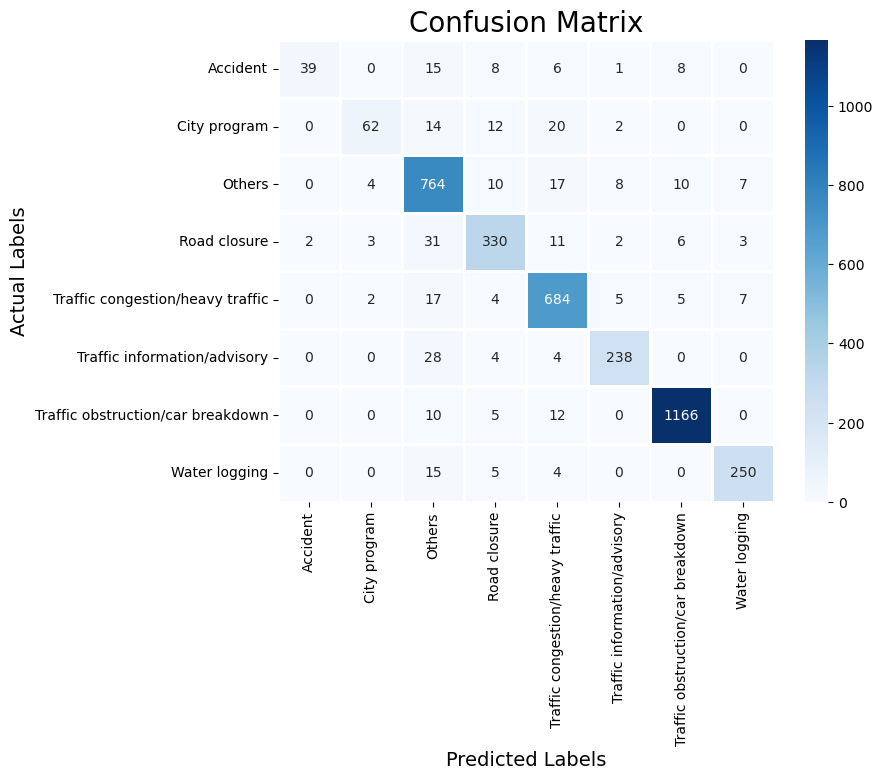

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
cm = pd.DataFrame(cm , index = [i for i in labels] , columns = [i for i in labels])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [40]:
y_test

array([4, 4, 6, ..., 7, 4, 6])

In [41]:
y_pred

array([4, 4, 6, ..., 7, 4, 6])

In [42]:
# return (y_test, prediction)
print(classification_report(y_test, y_pred))
f1 = f1_score(y_true = y_test, y_pred = y_pred, average = 'micro')

print('F1-score: ',f1*100,'%')

              precision    recall  f1-score   support

           0       0.95      0.51      0.66        77
           1       0.87      0.56      0.69       110
           2       0.85      0.93      0.89       820
           3       0.87      0.85      0.86       388
           4       0.90      0.94      0.92       724
           5       0.93      0.87      0.90       274
           6       0.98      0.98      0.98      1193
           7       0.94      0.91      0.92       274

    accuracy                           0.92      3860
   macro avg       0.91      0.82      0.85      3860
weighted avg       0.92      0.92      0.91      3860

F1-score:  91.52849740932642 %


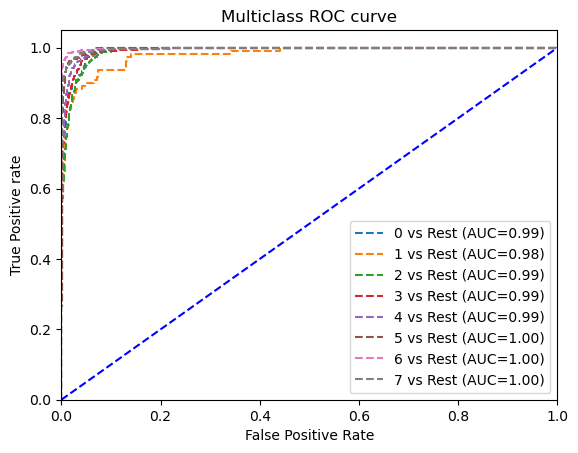

In [43]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve,auc
pred_prob = pred_proba
from sklearn.preprocessing import label_binarize
#binarize the y_values

classes = np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

# n_class = len(labels)

for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [44]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, fscore,_  = score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, pred_prob,multi_class='ovr')
print('Accuracy, precision, recall, fscore, Roc-AUC')
print('{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc))

Accuracy, precision, recall, fscore, Roc-AUC
0.915,0.912,0.819,0.853,0.993


In [45]:
import sys

with open(outputFilename, 'a') as f:
    print('XGBoost-w2v,{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc), file=f)

## With Infersent Embedding

In [46]:
X = pd.read_csv(path+'delhi_infercent_4096_2.csv')
X = X.iloc[:,1:]
# Y = pd.read_csv(path+'kolkata_classLabel_named.csv')
print(X.shape,Y.shape)

(15438, 4096) (15438,)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
print(X_train.shape, X_test.shape)

(11578, 4096) (3860, 4096)


In [48]:
model = XGBClassifier(objective="multi:softprob", random_state=42)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [49]:
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
pred_proba

array([[7.59554241e-05, 5.25875541e-04, 9.97581601e-01, ...,
        1.96274123e-04, 4.00746823e-04, 5.87030139e-04],
       [7.13356087e-07, 7.20880905e-07, 5.74103724e-05, ...,
        2.32827074e-06, 4.77009678e-07, 9.99936938e-01],
       [1.82857275e-05, 1.10133742e-05, 9.99806225e-01, ...,
        1.22010868e-04, 2.61668301e-05, 3.52644315e-06],
       ...,
       [4.39073074e-06, 9.26761277e-06, 9.99907255e-01, ...,
        6.84850784e-06, 4.12773943e-06, 2.01505577e-06],
       [5.50936347e-05, 4.86729405e-05, 5.24336683e-05, ...,
        1.16705824e-05, 1.10924084e-04, 1.52969351e-05],
       [1.84741002e-05, 1.27186959e-05, 4.11398578e-05, ...,
        8.79522486e-06, 2.53782073e-05, 4.64646146e-05]], dtype=float32)

In [50]:
# return (y_test, prediction)
print(classification_report(y_test, y_pred))
f1 = f1_score(y_true = y_test, y_pred = y_pred, average = 'micro')

print('F1-score: ',f1*100,'%')

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        64
           1       0.97      0.95      0.96       101
           2       0.92      0.97      0.95       871
           3       0.97      0.93      0.95       372
           4       0.96      0.97      0.97       688
           5       0.96      0.91      0.94       262
           6       1.00      0.98      0.99      1217
           7       1.00      0.98      0.99       285

    accuracy                           0.97      3860
   macro avg       0.97      0.96      0.96      3860
weighted avg       0.97      0.97      0.97      3860

F1-score:  96.60621761658031 %


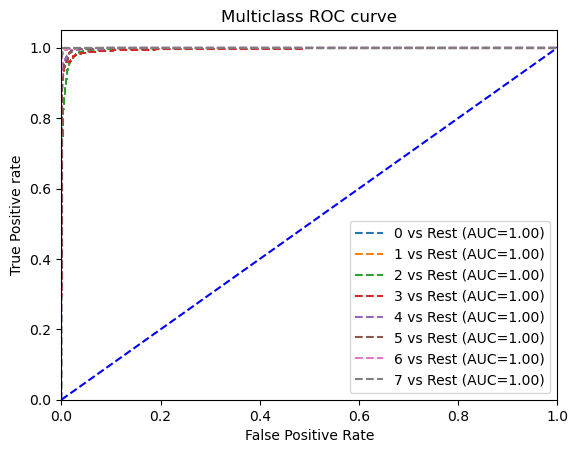

In [51]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve,auc
pred_prob = pred_proba
from sklearn.preprocessing import label_binarize
#binarize the y_values

classes = np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

# n_class = len(labels)

for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [52]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, fscore,_  = score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, pred_prob,multi_class='ovr')
print('Accuracy, precision, recall, fscore, Roc-AUC')
print('{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc))

Accuracy, precision, recall, fscore, Roc-AUC
0.966,0.971,0.958,0.964,0.999


In [53]:
import sys

with open(outputFilename, 'a') as f:
    print('XGBoost-infercent,{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc), file=f)